In [ ]:
Challenge Set 2
Topic:        Exploring Movies with Pandas
Date:         07/18/2016
Name:         Matthew Mitchell
Worked with:  Whitney/Graham (briefly)

In [5]:
import pandas as pd
%matplotlib inline

In [4]:
dataframe=pd.read_csv('2013_movies.csv')
dataframe.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


#Challenge 1

In [40]:
dataframe['ReleaseDate']=pd.to_datetime(dataframe.ReleaseDate)

In [41]:
dataframe.ReleaseDate[0]

Timestamp('2013-11-22 00:00:00')

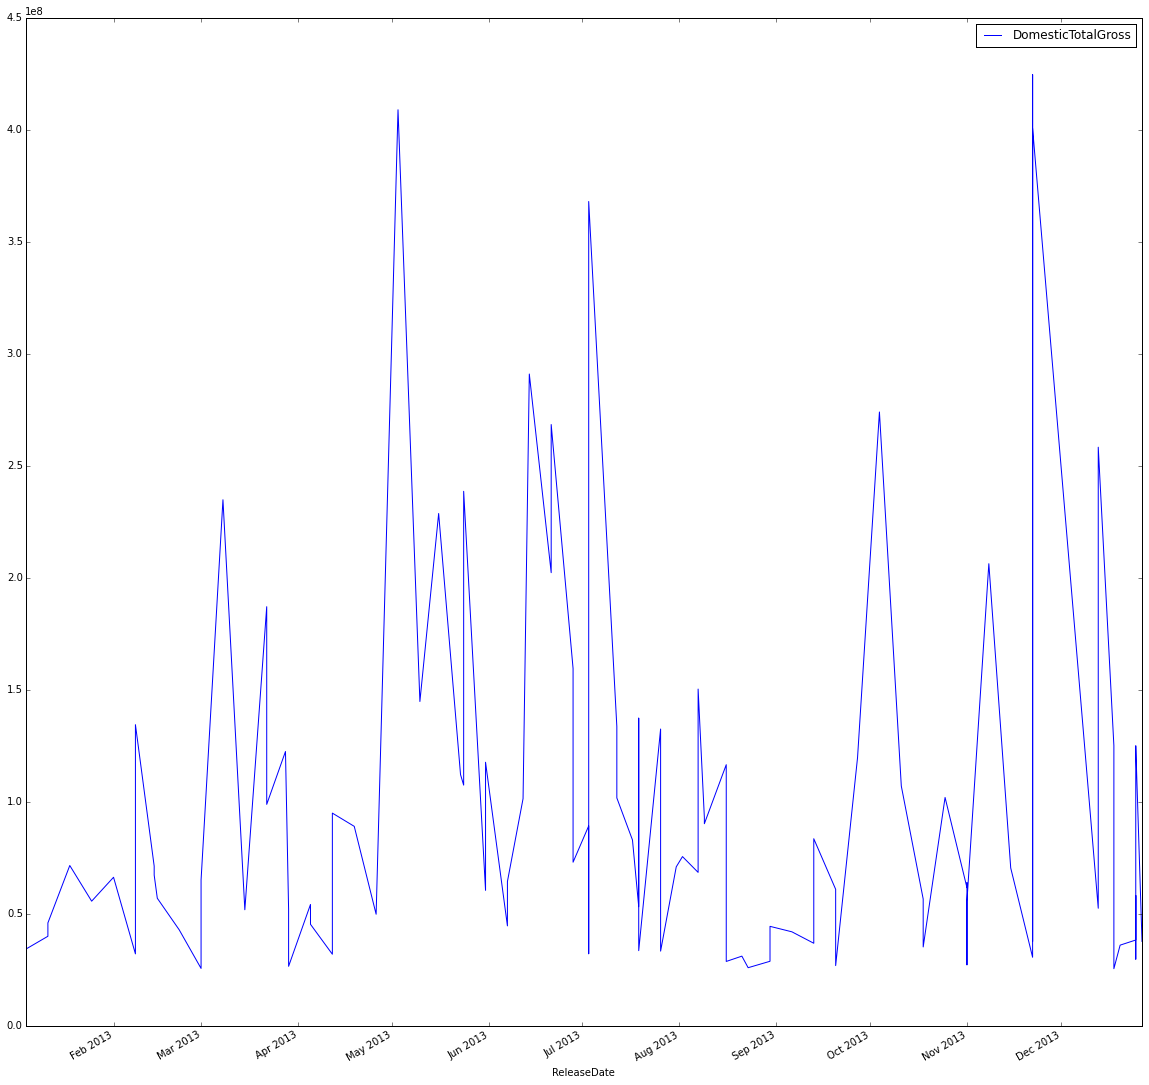

In [45]:
dataframe.plot(kind='line', x='ReleaseDate', y='DomesticTotalGross', figsize=(20,20), sort_columns=True)

#Challenge 2

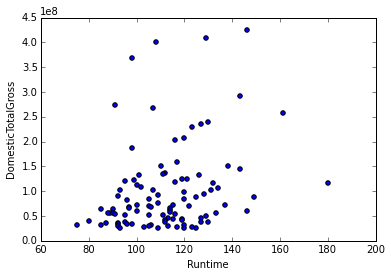

In [8]:
dataframe.plot(kind='scatter', x='Runtime', y='DomesticTotalGross')

#Challenge 3

In [19]:
dataframe.groupby('Rating')[['Runtime','DomesticTotalGross']].mean()

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


#Challenge 4

/Users/matthewmitchell/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


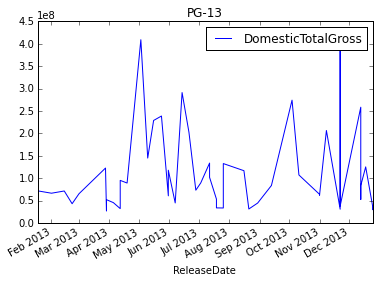

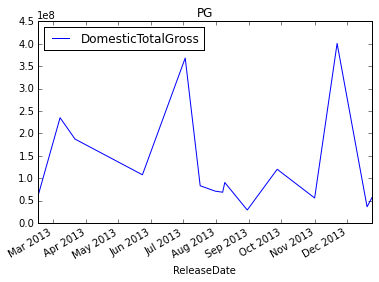

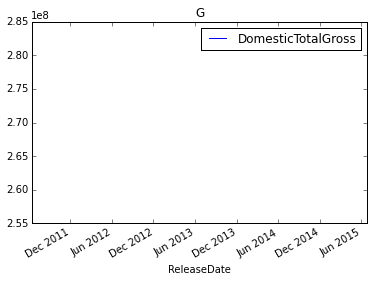

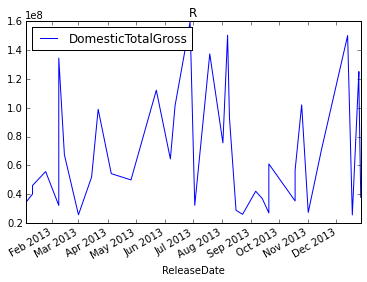

In [46]:
for MPAA in dataframe.Rating.unique():
    dataframe[dataframe.Rating==MPAA].plot(kind='line', x='ReleaseDate', y='DomesticTotalGross').set_title(MPAA)

#Challenge 5

In [36]:
average_gross_by_director=dataframe.groupby('Director')['DomesticTotalGross'].mean()
average_gross_by_director=pd.DataFrame(average_gross_by_director)
average_gross_by_director.sort_index(by='DomesticTotalGross', ascending=False).head()

,DomesticTotalGross
Director,
Francis Lawrence,424668047
Shane Black,409013994
Chris BuckJennifer Lee,400738009
Pierre CoffinChris Renaud,368061265
Zack Snyder,291045518


#Challenge 6

In [61]:
dataframe=dataframe.set_index('ReleaseDate')
dataframe.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime
ReleaseDate,,,,,,
2013-11-22,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146
2013-05-03,Iron Man 3,200000000,409013994,Shane Black,PG-13,129
2013-11-22,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108
2013-07-03,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98
2013-06-14,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143


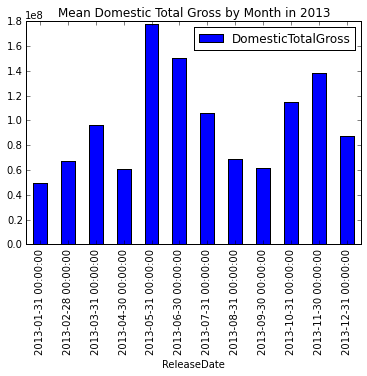

In [72]:
by_month=dataframe.groupby(pd.TimeGrouper("M")).mean()
by_month=by_month.reset_index()
by_month.plot(kind='bar', x= 'ReleaseDate', y='DomesticTotalGross').set_title('Mean Domestic Total Gross by Month in 2013')

In [ ]:
by_month=by_month.reset_index